## Imports

In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

import numpy as np ; na = np.newaxis
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

from cleverhans.plot.pyplot_image import grid_visual
from FEA import FeatureEnhancementAttack
from art.utils import load_dataset

Using TensorFlow backend.


## Data

In [3]:
(x_train, y_train), (x_test, y_test), _, _ = load_dataset(str('cifar10'))


x_train = x_train * 2 - 1; x_test = x_test * 2 - 1

m = range(100)
X = x_test[m, ...]
Y = y_test[m, :]
(img_rows, img_cols, nchannels) = X.shape[1:4]

## Model

In [4]:
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=X.shape[1:4]))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256))
model.add(Dense(256))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=128)
scores = model.evaluate(x_test, y_test)
print("Scores on test set: loss=%s accuracy=%s" % tuple(scores))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
50000/50000 [==============================] - 8s 152us/step - loss: 1.5041 - acc: 0.4538
Epoch 2/10
50000/50000 [==============================] - 7s 135us/step - loss: 1.1439 - acc: 0.5949
Epoch 3/10
50000/50000 [==============================] - 7s 136us/step - loss: 1.0085 - acc: 0.6464
Epoch 4/10
50000/50000 [==============================] - 7s 138us/step - loss: 0.9263 - acc: 0.6756
Epoch 5/10
50000/50000 [==============================] - 7s 138us/step - loss: 0.8649 - acc: 0.6982
Epoch 6/10
50000/50000 [==============================] - 7s 144us/step - loss: 0.8142 - acc: 0.7166
Epoch 7/10
50000/50000 [==============================] - 8s 166us/step - loss: 0.7808 - acc: 0.7285
Epoch 8/10
50000/50000 [==============================] - 7s 137us/step - loss: 0.7456 - acc: 0.7383
Epoch 9/10
50000/50000 [==============================] - 7s 139us/step 

## Nontargeted attack

Waiting...
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
100/100 [==============================] - 0s 139us/step

FEA-I test accuracy: 13.00%


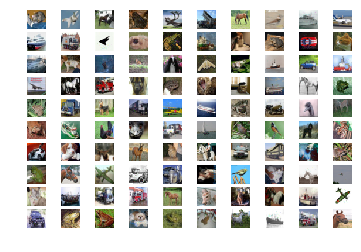

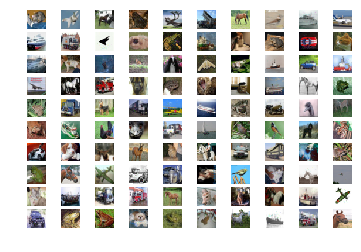

In [5]:
FEA_I = FeatureEnhancementAttack(model, X, targeted=False, rule='iter',eps=0.1, n=20)
(_, acc) = model.evaluate(FEA_I, Y)
print("\nFEA-I test accuracy: %.2f%%" % (acc * 100))

FEA_I = (FEA_I+1)/2.
grid_visual(np.reshape(FEA_I, (10, np.size(m) // 10, img_rows, img_cols, nchannels)))

Waiting...
100/100 [==============================] - 0s 124us/step

FEA-F test accuracy: 19.00%


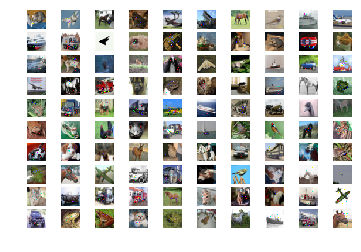

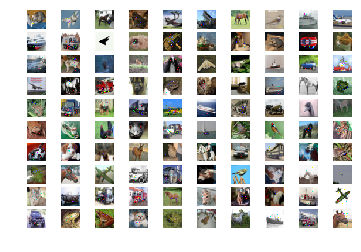

In [6]:
FEA_F = FeatureEnhancementAttack(model, X, targeted=False, rule='flip')
(_, acc) = model.evaluate(FEA_F, Y)
print("\nFEA-F test accuracy: %.2f%%" % (acc * 100))

FEA_F = (FEA_F+1)/2.
grid_visual(np.reshape(FEA_F, (10, np.size(m) // 10, img_rows, img_cols, nchannels)))

## Targeted attack

In [7]:
m = range(10)
X = X[m, ...]
Y = Y[m, :]

Waiting...
--------------------------------------
Attacking input 1/10
--------------------------------------
Attacking input 2/10
--------------------------------------
Attacking input 3/10
--------------------------------------
Attacking input 4/10
--------------------------------------
Attacking input 5/10
--------------------------------------
Attacking input 6/10
--------------------------------------
Attacking input 7/10
--------------------------------------
Attacking input 8/10
--------------------------------------
Attacking input 9/10
--------------------------------------
Attacking input 10/10


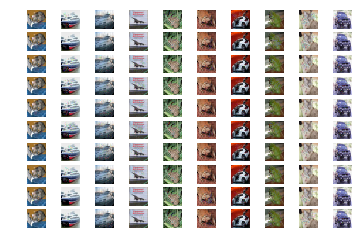

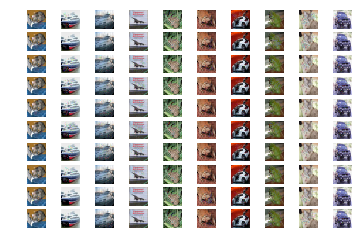

In [8]:
FEA_I = FeatureEnhancementAttack(model, X, targeted=True, eps=0.1, n=20)
FEA_I = (FEA_I+1)/2.
grid_visual(FEA_I)

Waiting...
--------------------------------------
Attacking input 1/10
--------------------------------------
Attacking input 2/10
--------------------------------------
Attacking input 3/10
--------------------------------------
Attacking input 4/10
--------------------------------------
Attacking input 5/10
--------------------------------------
Attacking input 6/10
--------------------------------------
Attacking input 7/10
--------------------------------------
Attacking input 8/10
--------------------------------------
Attacking input 9/10
--------------------------------------
Attacking input 10/10


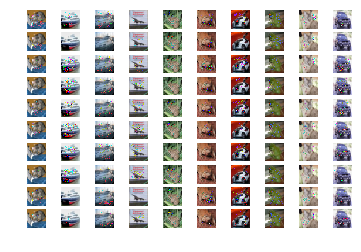

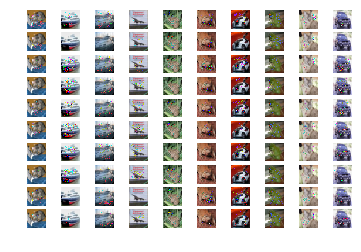

In [9]:
FEA_F = FeatureEnhancementAttack(model, X, targeted=True, rule='flip')
FEA_F = (FEA_F+1)/2.
grid_visual(FEA_F)